## Figures

* Synthetic greedy with a range of settings
* Synthetic greedy resource ratio
* Synthetic auction with a range of settings
* Synthetic DIA heuristic grid search
* Synthetic online batch sizes

## Model sizes
* 10 Tasks, 2 Servers (Elastic, Non elastic and Greedy)
* 15 Tasks, 3 Servers (Elastic, Non elastic and Greedy)
* 25 Tasks, 5 Servers (Non elastic and Greedy)
* 50 Tasks, 10 Servers (Greedy)
* 75 Tasks, 15 Servers (Greedy)

### P-test and paired t-test

In [1]:
import json
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import os
import sys
import re
sys.path.append(os.path.join(os.getcwd(), ".."))

from src.extra.io import save_plot

matplotlib.rcParams['font.family'] = "monospace"
%matplotlib inline

In [2]:
def collect_results(filename, col, algos):
    with open(filename) as file:
        results = json.load(file)
        return [[model_results[algo][col] for model_results in results if algo in model_results] 
                for algo in algos]

In [3]:
def get_model_size(filename):
    model_size = re.search(r't\d+_s\d+', filename).group(0)
    model_size = model_size.replace('t', '').replace('_s', ' Tasks, ') + ' Servers'
    return model_size

In [4]:
greedy_algo = 'Greedy Utility * deadline / Sum, Sum, Percent Sum'

## Synthetic greedy with a range of settings

In [5]:
greedy_folder = '../data/greedy'
greedy_filenames = [filename for filename in os.listdir('../data/greedy/') if 'synthetic' in filename]
greedy_filenames = sorted(greedy_filenames, key=lambda filename: int(re.search(r't\d+', filename).group(0).replace('t', '')))

greedy_filenames

['greedy_synthetic_r_t10_s2_dt06-10_15-23-25.json',
 'greedy_synthetic_r_t15_s3_dt06-11_13-02-33.json',
 'greedy_synthetic_r_t30_s6_dt06-10_15-23-25.json',
 'greedy_synthetic_r_t40_s8_dt06-10_15-23-25.json',
 'greedy_synthetic_r_t80_s16_dt06-10_15-24-00.json',
 'greedy_synthetic_r_t160_s32_dt06-10_15-25-03.json']

In [6]:
greedy_algos = ['Server Relaxed Flexible Optimal', 'Flexible Optimal', f' {greedy_algo}', 'Fixed Optimal']
greedy_algos_names = ['Server\nRelaxed\nElastic\nOptimal', 'Elastic\nOptimal', 
                      'Elastic\nGreedy\nAlgorithm', 'Non-elastic\nOptimal']

../data/greedy/greedy_synthetic_r_t10_s2_dt06-10_15-23-25.json
../data/greedy/greedy_synthetic_r_t15_s3_dt06-11_13-02-33.json
../data/greedy/greedy_synthetic_r_t30_s6_dt06-10_15-23-25.json
../data/greedy/greedy_synthetic_r_t40_s8_dt06-10_15-23-25.json
Save file location: figs/eps/greedy_social_welfare.eps
Save file location: figs/png/greedy_social_welfare.png
Save file location: figs/pdf/greedy_social_welfare.pdf


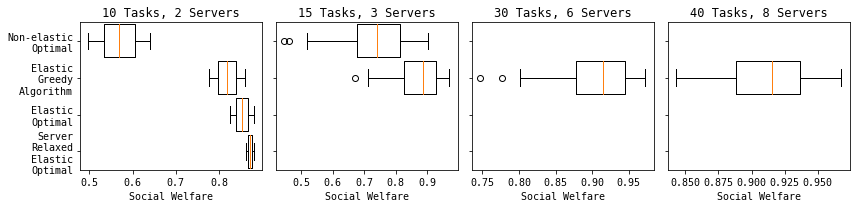

In [17]:
fig, axs = plt.subplots(1, 4, figsize=(12, 3))
for ax, filename in zip(axs, greedy_filenames):
    print(f'{greedy_folder}/{filename}')
    model_size_result = collect_results(f'{greedy_folder}/{filename}', 'social welfare percent', greedy_algos)
    ax.boxplot(model_size_result, vert=False, widths=0.9)
    
    ax.set_xlabel('Social Welfare')
    ax.set_yticklabels([''] * len(greedy_algos))
    ax.set_title(get_model_size(filename))

axs[0].set_yticklabels(greedy_algos_names)
fig.tight_layout()
save_plot('greedy_social_welfare')

greedy_synthetic_r_t10_s2_dt06-10_15-23-25.json
greedy_synthetic_r_t15_s3_dt06-11_13-02-33.json
greedy_synthetic_r_t30_s6_dt06-10_15-23-25.json
greedy_synthetic_r_t40_s8_dt06-10_15-23-25.json
greedy_synthetic_r_t80_s16_dt06-10_15-24-00.json
greedy_synthetic_r_t160_s32_dt06-10_15-25-03.json


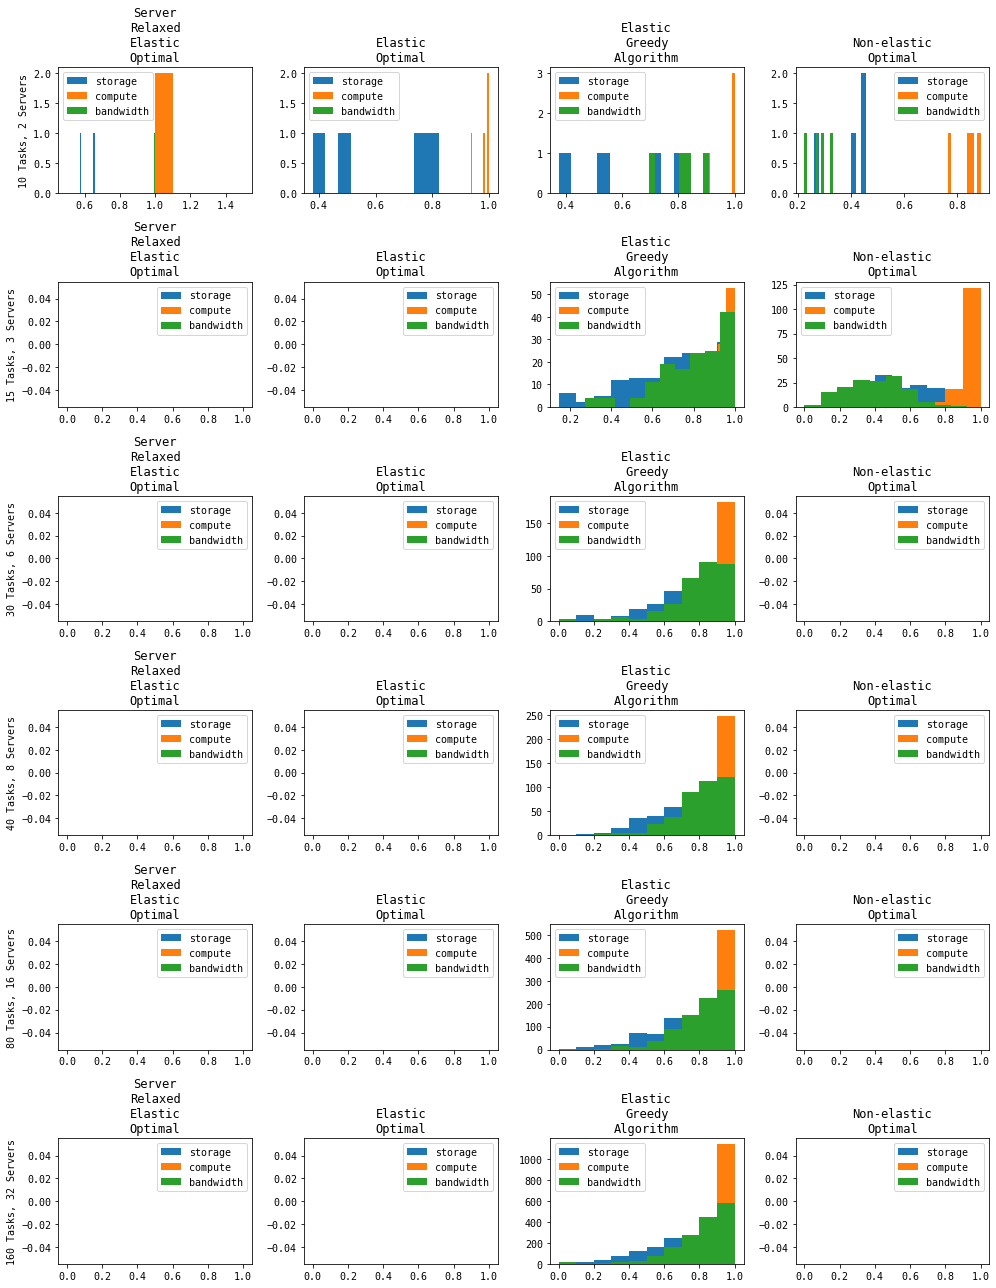

In [16]:
fig, axs = plt.subplots(len(greedy_filenames), 4, figsize=(14, 3*len(greedy_filenames)))
for pos, filename in enumerate(greedy_filenames):
    print(filename)
    with open(f'{greedy_folder}/{filename}') as file:
        data = json.load(file)

    algo_resource_usage = {algo: {'storage': [], 'compute': [], 'bandwidth': []} for algo in greedy_algos}
    for result in data:
        for algo in greedy_algos:
            if algo in result:
                algo_resource_usage[algo]['storage'] += list(result[algo]['server storage usage'].values())
                algo_resource_usage[algo]['compute'] += list(result[algo]['server compute usage'].values())
                algo_resource_usage[algo]['bandwidth'] += list(result[algo]['server bandwidth usage'].values())

    for ax, (algo, resource_usage), name in zip(axs[pos], algo_resource_usage.items(), greedy_algos_names):
        ax.set_title(name)
        for resource, usage in resource_usage.items():
            ax.hist(usage, bins=10, label=resource)
        ax.legend()
    axs[pos, 0].set_ylabel(get_model_size(filename))

plt.tight_layout()

## Synthetic greedy resource ratio

In [25]:
algorithms = [('Elastic Greedy Algorithm', f' {greedy_algo}'), ('Non-Elastic Optimal', 'Fixed Optimal')]
ratios = (0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9)

print(f'Folder files: {os.listdir("../data/resource_ratio")}')
ratio_resource_filename = os.listdir('../data/resource_ratio')[0]
print(f'Filename: {ratio_resource_filename}')
with open(f'../data/resource_ratio/{ratio_resource_filename}') as file:
    ratio_resource_data = json.load(file)

Folder files: ['resource_ratio_synthetic_r_t15_s3_dt06-11_11-34-15.json', 'resource_ratio_alibaba_r_t30_s6_dt06-05_13-30-59.json', 'resource_ratio_alibaba_r_t30_s6_dt06-07_11-35-18.json']
Filename: resource_ratio_synthetic_r_t15_s3_dt06-11_11-34-15.json


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Save file location: figs/eps/resource_ratio_social_welfare.eps
Save file location: figs/png/resource_ratio_social_welfare.png
Save file location: figs/pdf/resource_ratio_social_welfare.pdf


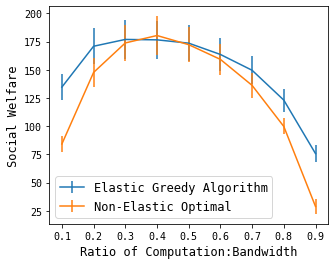

In [26]:
fig, ax = plt.subplots(figsize=(5, 4))
for name, algo in algorithms:
    social_welfares = [[model_data[f'ratio {ratio}'][algo]['social welfare'] 
                        for model_data in ratio_resource_data] for ratio in ratios]
    error = 1.96 * np.std(social_welfares, axis=1) / np.sqrt(len(ratio_resource_data))
    ax.errorbar(x=ratios, y=np.mean(social_welfares, axis=1), yerr=error, label=name)

ax.set_ylabel('Social Welfare', fontsize=12)
ax.set_xlabel('Ratio of Computation:Bandwidth', fontsize=12)

plt.legend(fontsize=12)
save_plot('resource_ratio_social_welfare')

Save file location: figs/eps/resource_ratio_server_usage.eps


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Save file location: figs/png/resource_ratio_server_usage.png
Save file location: figs/pdf/resource_ratio_server_usage.pdf


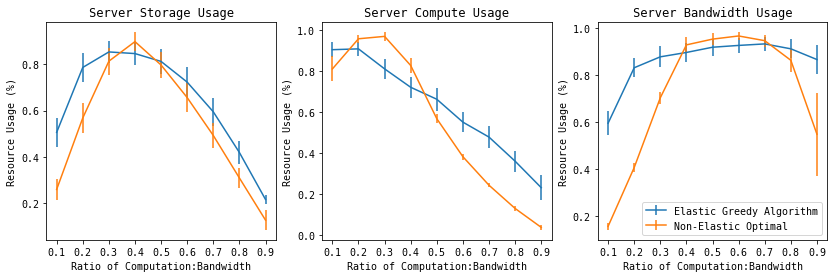

In [28]:
flatten = lambda t: [item for sublist in t for item in sublist]

fig, axs = plt.subplots(1, 3, figsize=(14, 4))
for ax, resource in zip(axs, ['server storage usage', 'server compute usage', 'server bandwidth usage']):
    ax.set_title(resource.title())
    for name, algo in algorithms:
        ratio_results = [flatten([list(model_data[f'ratio {ratio}'][algo][resource].values()) 
                                  for model_data in ratio_resource_data]) for ratio in ratios]
        ax.errorbar(ratios, np.mean(ratio_results, axis=1), 
                    yerr=1.96 * np.std(ratio_results, axis=1) / np.sqrt(len(ratio_resource_data)), label=name)
        
    ax.set_xticks(ratios)
    ax.set_xticklabels([str(ratio) for ratio in ratios])
    ax.set_xlabel('Ratio of Computation:Bandwidth')
    ax.set_ylabel('Resource Usage (%)')

plt.legend()
save_plot('resource_ratio_server_usage')

## Synthetic auction with a range of settings

In [37]:
auction_folder = '../data/auctions/'
auction_filenames = sorted(os.listdir(auction_folder))

auction_filenames

['auctions_synthetic_r_t10_s2_dt06-11_11-37-18.json',
 'auctions_synthetic_r_t15_s3_dt06-11_11-37-18.json',
 'auctions_synthetic_r_t30_s6_dt06-11_11-38-03.json',
 'auctions_synthetic_r_t40_s8_dt06-11_11-37-05.json']

In [50]:
auction_algos = ['Fixed VCG', 'Optimal DIA', 'Critical Value Auction' + greedy_algo.replace('Greedy', ''),
                 'Flexible VCG']
auction_algo_names = ['Non-Elastic\nVCG Auction', 'Elastic\nDecentralised\nIterative Auction', 
                      'Elastic Critical\nValue Auction', 'Elastic VCG\nAuction']

Save file location: figs/eps/auctions_social_welfare.eps
Save file location: figs/png/auctions_social_welfare.png
Save file location: figs/pdf/auctions_social_welfare.pdf


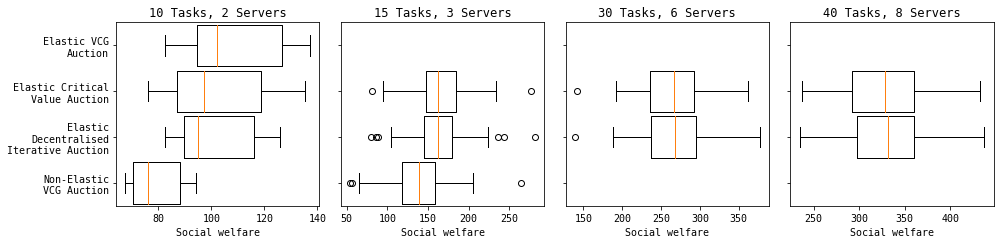

In [51]:
fig, axs = plt.subplots(1, len(auction_filenames), figsize=(14, 3.5))
for ax, filename in zip(axs, auction_filenames):
    results = collect_results(f'{auction_folder}/{filename}', 'social welfare', auction_algos)
    ax.boxplot(results, vert=False, widths=0.9)
    ax.set_xlabel('Social welfare')
    ax.set_yticklabels(['', '', '', ''])
    ax.set_title(get_model_size(filename))
    
axs[0].set_yticklabels(auction_algo_names)
fig.tight_layout()
save_plot('auctions_social_welfare')

Save file location: figs/eps/auctions_revenue.eps
Save file location: figs/png/auctions_revenue.png
Save file location: figs/pdf/auctions_revenue.pdf


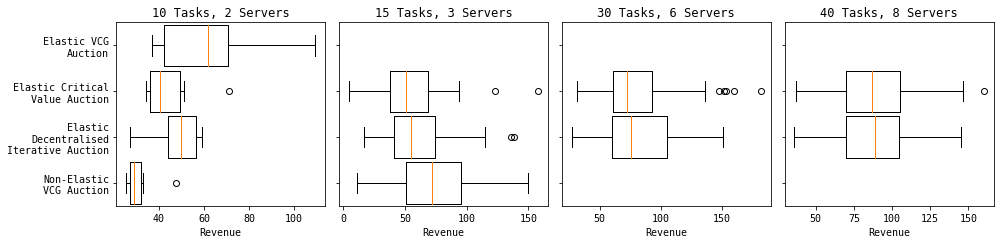

In [53]:
fig, axs = plt.subplots(1, len(auction_filenames), figsize=(14, 3.5))
for ax, filename in zip(axs, auction_filenames):
    results = collect_results(f'{auction_folder}/{filename}', 'total revenue', auction_algos)
    ax.boxplot(results, vert=False, widths=0.9)
    ax.set_xlabel('Revenue')
    ax.set_yticklabels(['', '', '', ''])
    ax.set_title(get_model_size(filename))
    
axs[0].set_yticklabels(auction_algo_names)
fig.tight_layout()
save_plot('auctions_revenue')

## Synthetic DIA heuristic grid search

In [54]:
dia_heuristic_folder = '../data/dia_heuristic/'
print(f'Filenames: {os.listdir(dia_heuristic_folder)}')
dia_heuristic_filename = os.listdir(dia_heuristic_folder)[0]
print(f'Filename: {dia_heuristic_filename}')

with open(f'{dia_heuristic_folder}/{dia_heuristic_filename}') as file:
    results_data = json.load(file)
print(f'Results size: {len(results_data)}')
    
heuristic_results = {}
for model_results in results_data:
    for heuristic, heuristic_result in model_results.items():
        if heuristic == 'model':
            continue
        elif heuristic in heuristic_results:
            heuristic_results[heuristic].append(heuristic_result)
        else:
            heuristic_results[heuristic] = [heuristic_result]

Filenames: ['dia_heuristic_grid_search_synthetic_r_t30_s6_dt06-12_04-59-23.json', 'dia_heuristic_grid_search_synthetic_r_t30_s6_dt06-10_16-55-11.json']
Filename: dia_heuristic_grid_search_synthetic_r_t30_s6_dt06-12_04-59-23.json
Results size: 50


In [55]:
heuristic_avg_results = []
for heuristic, results in heuristic_results.items():
    heuristic_avg_results.append([
        heuristic, results[0]['price change'], results[0]['initial price'],
        [r['social welfare'] for r in results],
        [r['social welfare percent'] for r in results],
        [r['percentage tasks allocated'] for r in results],
        [r['total revenue'] for r in results],
        [r['rounds'] for r in results],
        [r['solve time'] for r in results],
        [task_price for r in results for task_price in r['task prices'].values()],
        np.mean([r['social welfare'] for r in results]),
        np.mean([r['total revenue'] for r in results]),
        np.mean([r['rounds'] for r in results]),
        np.mean([task_rounds for r in results for task_rounds in r['task rounds'].values()])
    ])
    
heuristic_df = pd.DataFrame(heuristic_avg_results, columns=[
    'name', 'price change', 'initial price', 'social welfare', 'social welfare percent', 
    'percentage tasks allocated', 'revenue', 'rounds', 'solve time', 'task prices', 
    'avg social welfare', 'avg revenue', 'avg rounds', 'avg task rounds',
])
heuristic_df = heuristic_df.sort_values(by=['price change', 'initial price'])

In [57]:
def heuristic_heatmap(ax, df, col, title='', print_heatmap=True):
    initial_prices = np.flip(pd.unique(df['initial price']))
    price_changes = pd.unique(df['price change'])
    
    ax.set_yticks(np.arange(len(price_changes)))
    ax.set_yticklabels(list(reversed(price_changes)), fontsize=11)
    ax.set_ylabel('Bid Increment', fontsize=13)
    
    ax.set_xticks(np.arange(len(initial_prices)))
    ax.set_xticklabels(list(reversed(initial_prices)), fontsize=11)
    ax.set_xlabel('Reserve Price', fontsize=13)
    
    heatmap = ax.imshow(df.pivot(index='price change', columns='initial price', values=col).sort_index(axis=0, ascending=False))
    colour_bar = plt.colorbar(heatmap, shrink=0.82, ax=ax)
    ax.set_title(title)
    
    for x, initial_price in enumerate(initial_prices):
        for y, price_change in enumerate(price_changes):
            label = df[df['name'] == f'IP: {initial_price}, PC: {price_change}'].get(col).values[0]
            ax.text(len(initial_prices) - 1 - x, len(price_changes) - 1 - y, 
                    round(label), color='white', ha='center', va='center', weight='bold', fontsize=12)
            
    if print_heatmap:
        print(f'\n\t{col}')
        print(df.pivot(index='price change', columns='initial price', 
                       values=col).sort_index(axis=0, ascending=True))
        print()

Save file location: figs/eps/dia_heuristic_grid_search.eps
Save file location: figs/png/dia_heuristic_grid_search.png
Save file location: figs/pdf/dia_heuristic_grid_search.pdf


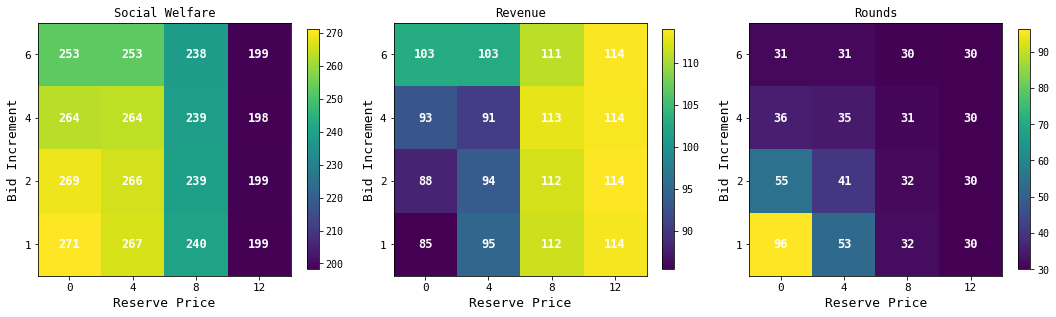

In [58]:
fig, (ax_social_welfare, ax_revenue, ax_rounds) = plt.subplots(1, 3, figsize=(15, 4.5))

heuristic_heatmap(ax_social_welfare, heuristic_df, 'avg social welfare', 'Social Welfare', False)
heuristic_heatmap(ax_revenue, heuristic_df, 'avg revenue', 'Revenue', False)
heuristic_heatmap(ax_rounds, heuristic_df, 'avg rounds', 'Rounds', False)

plt.tight_layout()
save_plot('dia_heuristic_grid_search')

## Synthetic online batch sizes

In [ ]:
online_folder = '../data/online'
print(f'Online filenames: {os.listdir(online_folder)}')
online_filename = sorted(os.listdir(online_folder))[0]
with open(f'{online_folder}/{online_filename}') as file:
    online_data = json.load(file)

online_df = pd.Dataframe()
sns.boxplot(x='social welfare', y='model size', hue='algorithm', data=online_df)

plt.tight_layout()
save_plot('online_social_welfare')